<h1><strong><span style="font-size: x-large;">MATI 2020-2021. Práctica 4<br /></span></strong></h1>
<p><strong><span style="font-size: x-large;">Coloreado<br /></span></strong></p>

In [1]:
H = Graph() # grafos vacios, sin ningún vértice

In [2]:
H =graphs.RandomGNP(30,3/30)

In [3]:
H.chromatic_number()

3

In [4]:
H.coloring()

[[0, 5, 9, 10, 17, 2, 3, 15, 24, 4, 13, 26, 1, 28],
 [8, 23, 7, 22, 12, 6, 27, 20, 14, 16, 18, 21],
 [11, 19, 29, 25]]

<p><strong><span style="font-size: large;">Generador de grafos</span></strong></p>
<p><span style="font-size: medium;">Sage nos da la posibilidad de generar un conjunto de grafos con ciertas carácterísticas libre de isomorfismos, por ejem. el número de vértices.</span></p>

In [5]:
graphs(5)

<generator object GraphGenerators.__call__ at 0x6fe3a41ae58>

<p>En la siguiente instrucción le pedimos que nos muestre los grafos del generador graphs(5), para ello los metemos en una lista llamada grafos_5v</p>

Existen 34 grafos libres de isomorfismos con 5 vértices:


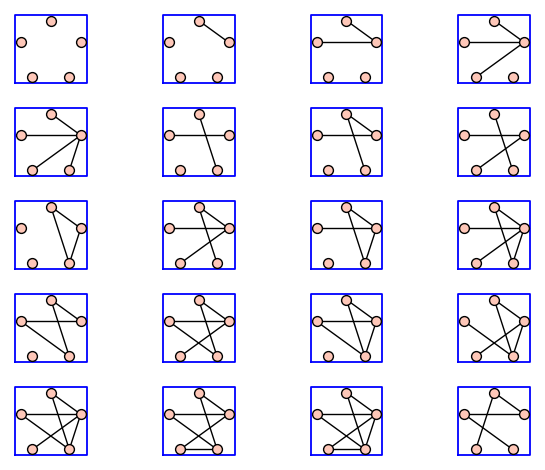

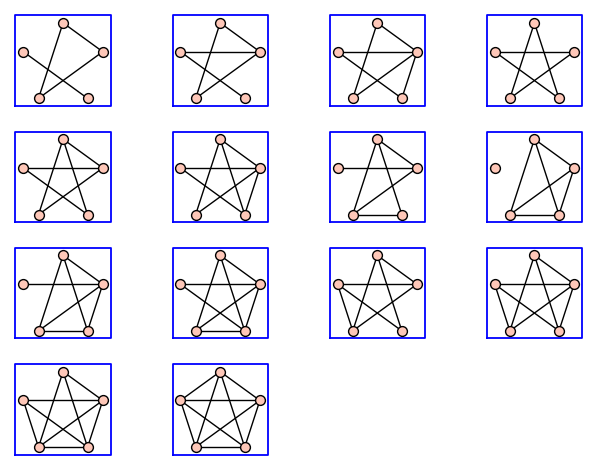

In [8]:
grafos_5v = [gr for gr in graphs(5)]
print('Existen %d grafos libres de isomorfismos con 5 vértices:'%len(grafos_5v))
graphs_list.show_graphs(grafos_5v)

<p>Si quiero seleccionar alguno de la lista:</p>

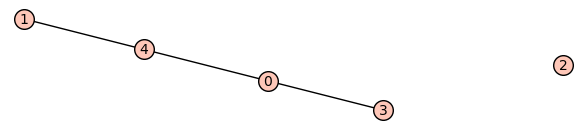

In [9]:
grafos_5v[6].plot()

<p>También podemos seleccionar de todos ellos aquellos que tengan un número de aristas.</p>

Existen 4 grafos libres de isomorfismos con 5 vértices y 7 aristas:


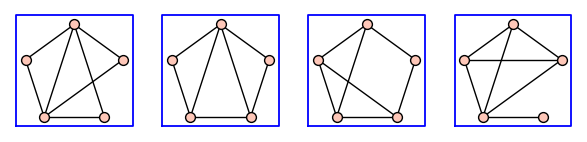

In [11]:
grafos_5v7a = [gr for gr in graphs(5, size=7)]
print('Existen %d grafos libres de isomorfismos con 5 vértices y 7 aristas:'%len(grafos_5v7a))
graphs_list.show_graphs(grafos_5v7a)

<p>O que cumplan una determinada propiedad, por ejemplo que sean conexos, con la siguiente instrucción hacemos que tras generarlos compruebe uno a uno si son conexos</p>

Existen 21 grafos conexos libres de isomorfismos con 5 vértices 


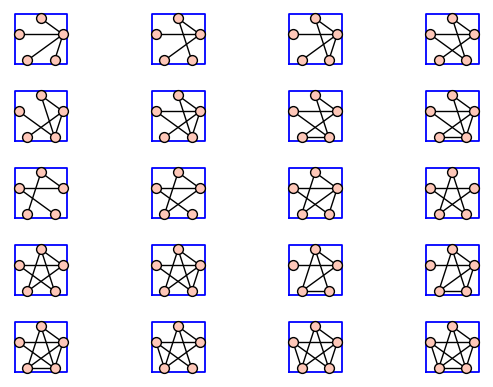

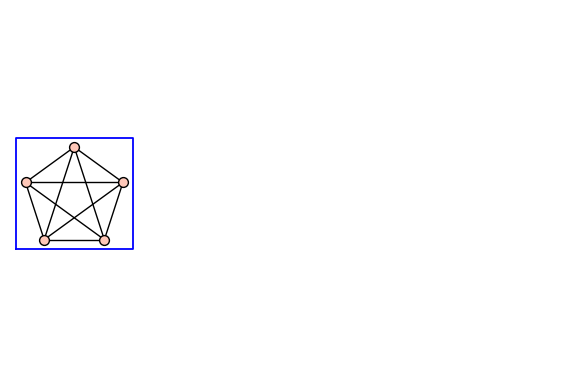

In [20]:
carac=lambda G: (G.is_connected())
grafos5conexos=list(filter(carac, graphs(5)))
print( 'Existen %d grafos conexos libres de isomorfismos con 5 vértices '%len(grafos5conexos))
graphs_list.show_graphs(grafos5conexos)

Existen 13 grafos no conexos libres de isomorfismos con 5 vértices 


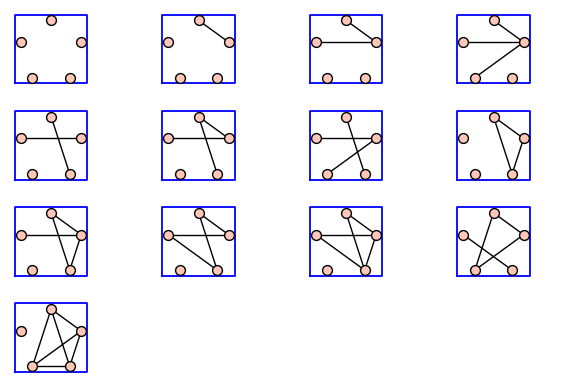

In [21]:
carac=lambda G: (G.is_connected()==false)
grafos5noconexos=list(filter(carac, graphs(5)))
print('Existen %d grafos no conexos libres de isomorfismos con 5 vértices '%len(grafos5noconexos))
graphs_list.show_graphs(grafos5noconexos)

<p>Si la propiedad que queremos verificar no está entre los métodos de Sage, podemos crearla nosotros. El siguiente ejemplo te muestra los grafos con un número de vértices  y mínima valencia determinada.</p>

Existen 11 grafos con 5 vértices y grado >=2:


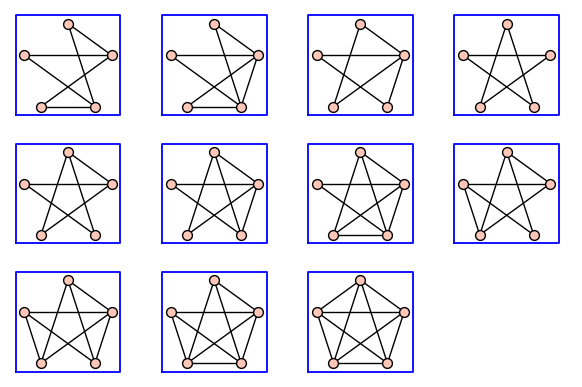

In [24]:
vertices = 5; grado = 2
caracteristica = lambda G: (min([G.degree(v) for v in G]) >= grado)
lista_grafos = list(filter(caracteristica, graphs(vertices)))
print('Existen %d grafos con %d vértices y grado >=%d:'%(len(lista_grafos),vertices,grado))
graphs_list.show_graphs(lista_grafos)

<p>Nosotros en esta práctica pretendemos buscar grafos críticos respecto al color con un múmero pequeño de vértices, (la busqueda para grafos de orden grande puede suponer demasiado tiempo pues el coste computacional es grande).</p>
<p>Previamente, sabiendo que los grafos criticos no tienen vértices de corte, buscaremos aquellos grafos que sean dos conexos, para ello vamos a definir la función "is_dos_conexo".</p>

In [52]:
def is_dos_conexo(G):
    vertices=G.vertices()
    for u in vertices:
        H=copy(G)
        H.delete_vertex(u)
        if H.is_connected()==false:
            return false
            break
    return true

In [51]:
is_dos_conexo(H)

NameError: name 'H' is not defined

<p></p><p></p><p align="center"><strong><span style="font-size: x-large;">Ejercicios para entregar</span></strong></p>

<p><strong><span style="color: #800000;">Ejercicio 1.  Selecciona de todos los grafos con 7 vértices aquellos que sean 2-conexos y guardalos en una lista. ¿Cuántos hay?. Dibuja  y cálcula el número cromático del que ocupa el lugar número 20 en la lista.</span></strong></p>

In [53]:
caracteristicas = lambda G: (is_dos_conexo(G))
lista_grafos = list(filter(caracteristicas, graphs(7)))
print('Existen %d grafos con 7 vértices 2-conexos '%len(lista_grafos))

Existen 468 grafos con 7 vértices 2-conexos 


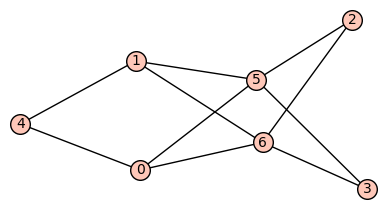

número cromático:  2
lista de colores:  [[0, 1, 2, 3], [4, 5, 6]]


In [59]:
show(lista_grafos[19])
print('número cromático: ',lista_grafos[19].chromatic_number())
print('lista de colores: ',lista_grafos[19].coloring())

<p><strong><span style="color: #800000; font-size: medium;">Ejercicio 2.  Siguiendo el modelo de la función is_dos_conexo definida arriba, define una nueva función is_critico que verifique si un grafo conexo es crítico para el color, (recuerda que un grafo conexo será crítico para el color si al eliminar una arista disminuye su número cromático). Verifica tu función con dos grafos uno crítico y otro no.</span></strong></p>

In [159]:
def is_critico(h):
    g=h.copy()
    nx=g.chromatic_number()
    #print('nx: ',nx)
    res=false
    for i in g.edges():
        g.delete_edge(i)
        #print('nxm: ',g.chromatic_number())
        if nx>g.chromatic_number():
            #print('borrando arista: ',i)
            res=true
            break
        else:
            g.add_edge(i)
    return res

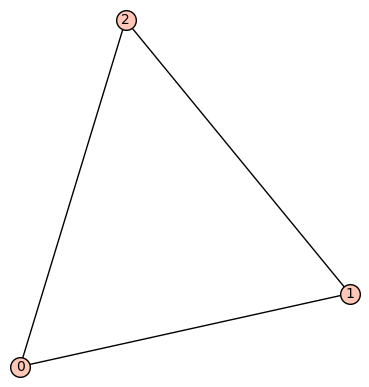

True

In [155]:
g=Graph({0:[1,2],1:[2]})
g.show()
is_critico(g)


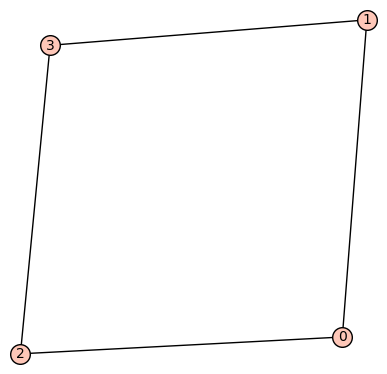

False

In [168]:
g=Graph({0:[1,2],2:[3],3:[1]})
show(g)
is_critico(g)

<p><strong><span style="color: #800000;">Ejercicio 3. Cálcula los grafos 4-críticos de 7 vértices. ¿Existe algún 5.crítico de 7 vértices?. Dame el número de aristas del primer 6-crítico de 8 vértices que encuentres.</span></strong></p>

In [160]:
caract1 = lambda G:(is_critico(G) and G.chromatic_number()==4)
lista_grafos = list(filter(caract1,graphs(7)))
print('Existen %d grafos con 7 vértices y 4-críticos'%(len(lista_grafos)))

Existen 303 grafos con 7 vértices y 4-críticos


In [161]:
caract1 = lambda G:(is_critico(G) and G.chromatic_number()==5)
lista_grafos = list(filter(caract1,graphs(7)))
print('Existen %d grafos con 7 vértices y 5-críticos'%(len(lista_grafos)))

Existen 52 grafos con 7 vértices y 5-críticos


In [164]:
caract1 = lambda G:(is_critico(G) and G.chromatic_number()==6)
lista_grafos = list(filter(caract1,graphs(8)))
print('El número de arista del primer 6-critico de 8 vértices: ',len(lista_grafos[0].edges()))

El número de arista del primer 6-critico de 8 vértices:  15


<h3><strong><span style="color: #ff0000;">ESTA PRÁCTICA SE ENTREGA EN LA ACTIVIDAD CORRESPONDIENTE ANTES DEL VIERNES 20 de NOVIEMBRE a las 23:59 GMT</span></strong></h3>